# ML Final Project

**Scenario:** You work at a multinational bank that is aiming to increase it's market share in 
Europe. Recently, it has been noticed that the number of customers using the banking 
services has declined, and the bank is worried that existing customers have stopped 
using them as their main bank. <br> 

As a data scientist, you are tasked with finding out the 
reasons behind customer churn (when a customer stops using them as the main bank) and to predict customer churn. <br> 

The marketing team, 
in particular, is interested in your findings and want to better understand existing 
customer behavior and possibly predict customer churn. Your results will help the 
marketing team to use their budget wisely to target potential churners. To achieve 
this objective, in this exercise, you will import the banking data (Churn_Modelling.csv) 
provided by the bank and do some machine learning to solve their problem.

Data dictionary

- CustomerID: Unique ID of each customer
- CredRate: Credit Score of the customer 
- Geography: Country customer is from 
- Gender
- Age
- Tenure: How long customer has been with bank 
- Prod Number: Number of products customer has with bank 
- HasCrCard: Does customer have credit card
- ActMem: Is customer active member 
- Estimated salary: Annual estimated salary of customer 
- Exited: Whether customer has churned (1 is yes)

## Libraries and the usual

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import normaltest
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

import eli5
from eli5.sklearn import PermutationImportance

#dynamically resize notebook width to screensize for easier visibility in presentation
#RUN THIS BEFORE PRESENTATION
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
#for superscript
Sup = str.maketrans("12345678", "¹²³⁴⁵⁶⁷⁸")

C:\Users\markc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\markc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#bold font and set font color for easier readibility in presentation
def printf(message, newLine = True):
    out = '\x1b[0;30;43m' + '\033[1m' + message + '\033[0m' + '\x1b[0m'
    print(out) if newLine else print(out, end='')

## Exploratory Data Analysis (EDA)

### Loading and understanding the data

In [3]:
#load the data
raw_df = pd.read_csv("Churn_Modelling.csv")

#make a copy of the df for processing
df = raw_df.copy()

In [4]:
#max df visibility to widescreen
pd.set_option('display.expand_frame_repr', False)

#Familiarizing the data
printf("Rows = ", False); print(df.shape[0])
printf("Columns = ", False); print(df.shape[1])
printf("\nSample top 5 rows of data :\n"); print(df.head())
printf("\nData integrity :"); print(df.info())
printf("\nData statistics :\n"); print(df.describe())

# See unique values for each col
printf("The number of unique values = ", False); df.nunique()

Rows = 10000
Columns = 12

Sample top 5 rows of data :

   CustomerId  CredRate Geography  Gender   Age  Tenure    Balance  Prod Number  HasCrCard  ActMem  EstimatedSalary  Exited
0    15634602       619    France  Female  42.0       2       0.00            1          1       1        101348.88       1
1    15647311       608     Spain  Female  41.0       1   83807.86            1          0       1        112542.58       0
2    15619304       502    France  Female  42.0       8  159660.80            3          1       0        113931.57       1
3    15701354       699    France  Female  39.0       1       0.00            2          0       0         93826.63       0
4    15737888       850     Spain  Female  43.0       2  125510.82            1          1       1         79084.10       0

Data integrity :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ------

CustomerId         10000
CredRate             460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
Prod Number            4
HasCrCard              2
ActMem                 2
EstimatedSalary     9995
Exited                 2
dtype: int64

### Cleaning the data

In [5]:
#remove irrelevant data
df = df.drop('CustomerId',axis=1)
printf("Irrelevant Data: Dropping CustomerID...")

Irrelevant Data: Dropping CustomerID...


In [6]:
printf("Number of missing data :\n"); df.isnull().sum()

Number of missing data :



CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [7]:
printf("\nThe rows with missing data are :\n")
df[df.isnull().any(axis=1)]


The rows with missing data are :



,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
6,822,France,NaN,50.0,7,0.00,2,1,1,10062.80,0
10,528,France,Male,NaN,6,102016.72,2,0,0,80181.12,0
11,497,Spain,Male,NaN,3,0.00,2,1,0,76390.01,0
12,476,France,Female,NaN,10,0.00,2,1,0,26260.98,0
37,804,Spain,Male,NaN,7,76548.60,1,0,1,98453.45,0
38,850,France,Male,NaN,7,0.00,1,1,1,40812.90,0
39,582,Germany,Male,NaN,6,70349.48,2,0,1,178074.04,0
74,519,France,Male,36.0,9,0.00,2,0,1,NaN,0
77,678,France,Female,32.0,9,0.00,1,1,1,NaN,0
87,729,France,Male,30.0,9,0.00,2,1,0,NaN,0


In [8]:
df.dropna(axis=0, how='any', inplace=True)
printf("Missing Data: Dropping rows...")
printf("Rows = ", False); print(df.shape[0])
printf("Columns =", False); print(df.shape[1])

Missing Data: Dropping rows...
Rows = 9986
Columns =11


### Correlation, outliers and Visualisation

In [9]:
pd.set_option('display.expand_frame_repr', True) 
print(printf("Correlation within data :\n"), df.corr())
printf("\n There appears to be little to none relationship between the variables:\n")

Correlation within data :

None                  CredRate       Age    Tenure   Balance  Prod Number  \
CredRate         1.000000 -0.004527  0.000996  0.006342     0.012860   
Age             -0.004527  1.000000 -0.009615  0.028017    -0.030747   
Tenure           0.000996 -0.009615  1.000000 -0.011429     0.013030   
Balance          0.006342  0.028017 -0.011429  1.000000    -0.304151   
Prod Number      0.012860 -0.030747  0.013030 -0.304151     1.000000   
HasCrCard       -0.005861 -0.011965  0.022919 -0.014305     0.003255   
ActMem           0.024736  0.085004 -0.028382 -0.010208     0.009971   
EstimatedSalary -0.001044 -0.007227  0.008114  0.012623     0.014379   
Exited          -0.027140  0.285152 -0.013342  0.117958    -0.047585   

                 HasCrCard    ActMem  EstimatedSalary    Exited  
CredRate         -0.005861  0.024736        -0.001044 -0.027140  
Age              -0.011965  0.085004        -0.007227  0.285152  
Tenure            0.022919 -0.028382         0.00

Pictorial heatmap of correlation :



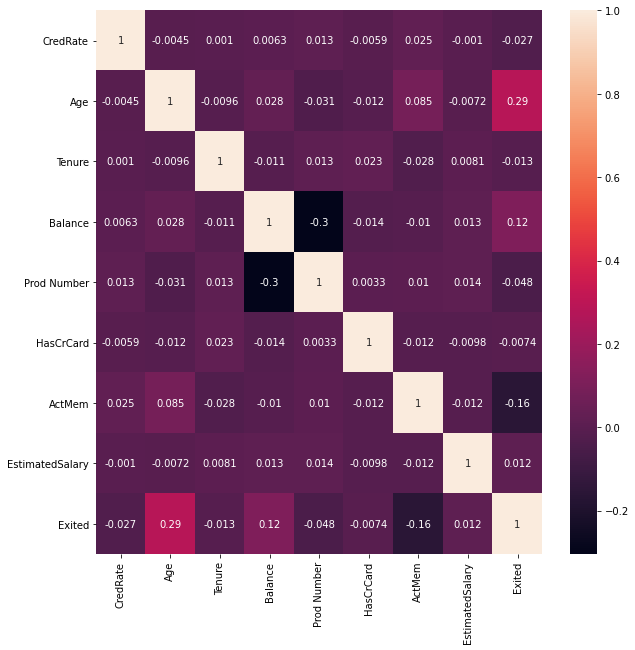

In [10]:
printf("Pictorial heatmap of correlation :\n")
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True);

Histogram diagonal plots of Credit, Age and balance appears to be normally distributed :

Plots also confirms little to none relationship to one another for multicollinearity



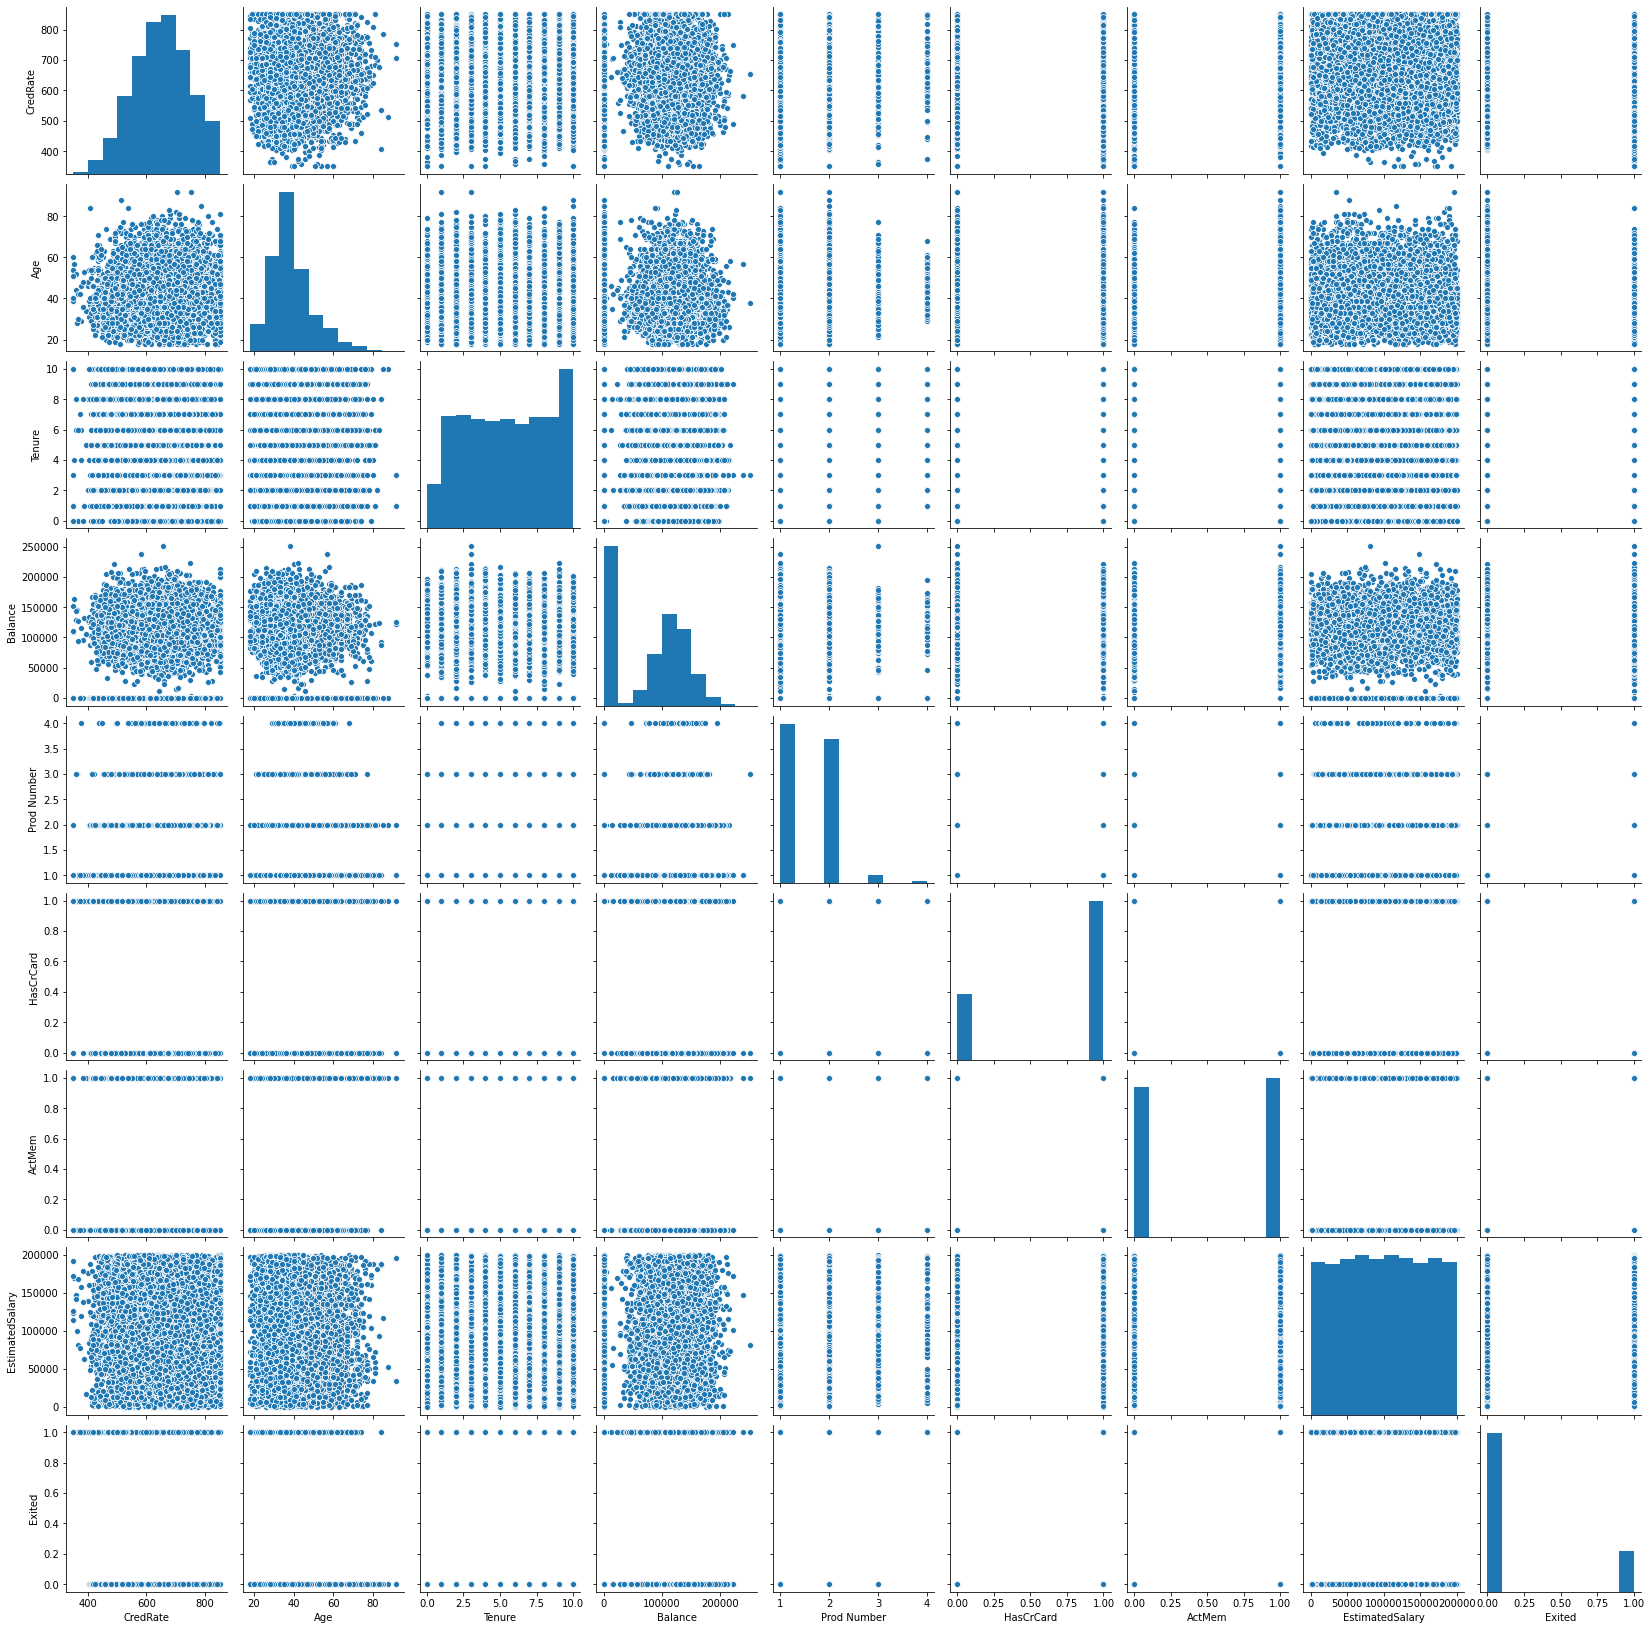

In [11]:
printf("Histogram diagonal plots of Credit, Age and balance appears to be normally distributed :\n")
printf("Plots also confirms little to none relationship to one another for multicollinearity\n")
sns.pairplot(df);

Taking a clearer look at the histograms :



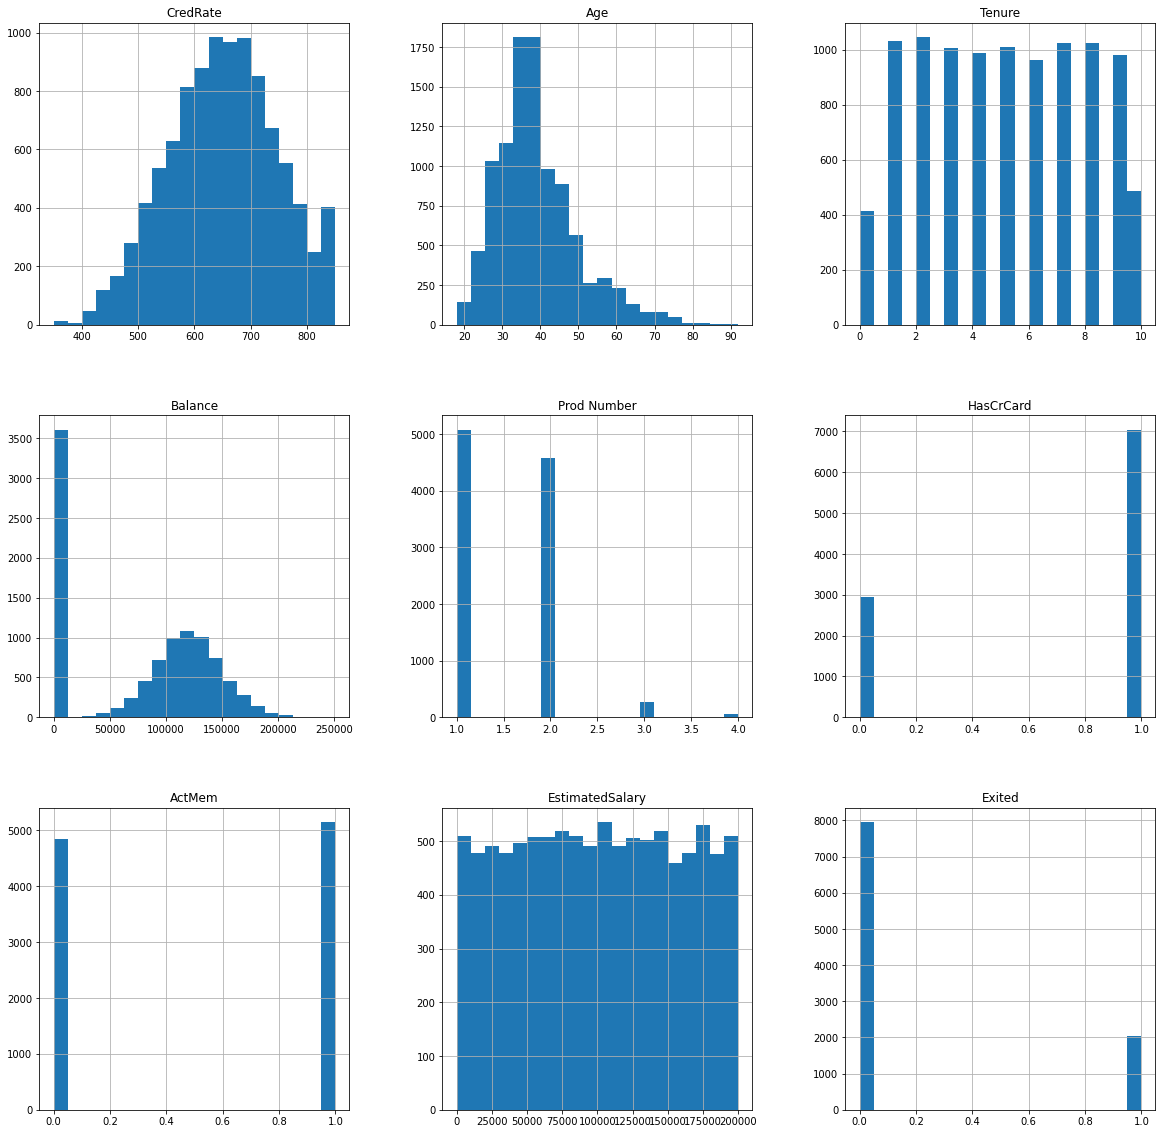

In [12]:
printf("Taking a clearer look at the histograms :\n")
df.hist(figsize=(20, 20), bins=20);

Boxplots for all the variables :

We shall ignore the outliers shown in the boxplot :

We shall KIV the outliers shown in CredRate and Age :



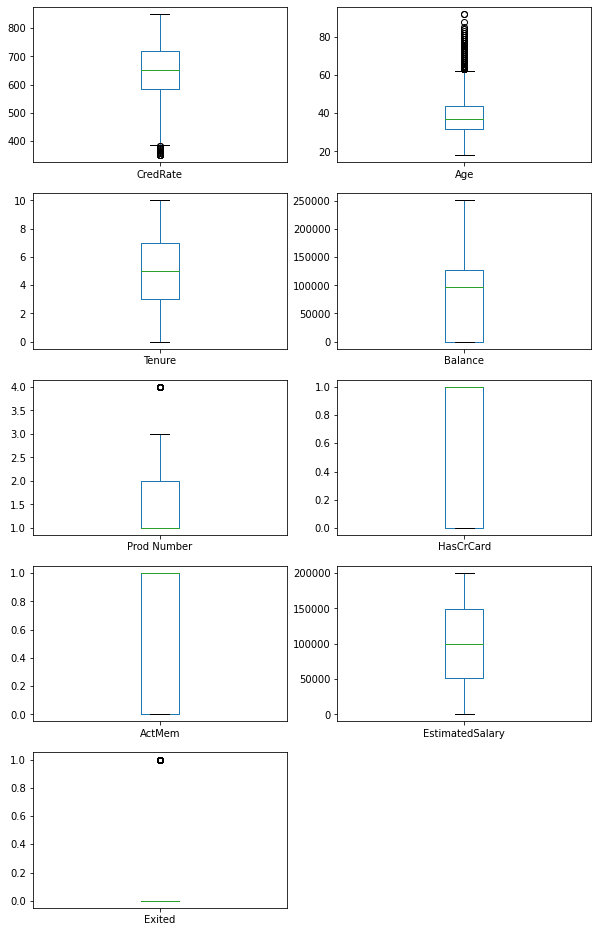

In [13]:
printf("Boxplots for all the variables :\n")
df.plot(kind='box', subplots=True, layout=(6,2), figsize=(10,20))
printf("We shall ignore the outliers shown in the boxplot :\n")
printf("We shall KIV the outliers shown in CredRate and Age :\n")

### Pre - processing

In [14]:
#make a copy of the cleaned df
cleaned_df = df.copy()

#Replacing categorical data
printf("Replacing categorical data into numerical features\n")
cleaned_df = pd.get_dummies(cleaned_df, columns=['Geography', 'Gender'], drop_first=True)
cleaned_df.head()

Replacing categorical data into numerical features



,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41.0,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42.0,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39.0,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43.0,2,125510.82,1,1,1,79084.10,0,0,1,0


### Feature Scaling

In [15]:
#make a copy of the processed df
processed_df = cleaned_df.copy()

In [16]:
#Checking for Gaussian distributions

printf("Checking for Gaussian distributions\n")
def testNormality(name, data):
    #use Shapiro-Wilk test if n<5000
    #else use Lilliefors corrected Kolmogorov-Smirnov (K-S) test whose low power is exposed to outliers
    #therefore use D’Agostino’s K2 test in this case since much time is needed to analyse only 1 feature for outliers.
    test = "D’Agostino’s K2"
    stat, p = normaltest(data)
    
    #assume H0 hypothesis of 0.05
    alpha = 0.05
    if p > alpha:
        print(test.translate(Sup), "test:", name, "appears Gaussian (H0 accepted). P-value of", p , "> alpha of", alpha)
    else:
        print(test.translate(Sup), "test:", name, "does not behave Gaussian (H0 rejected). P-value of", p , "< alpha of", alpha)

for (columnName, columnData) in processed_df.iteritems(): 
    testNormality(columnName, columnData.values)

Checking for Gaussian distributions

D’Agostino’s K² test: CredRate does not behave Gaussian (H0 rejected). P-value of 3.5734701649672445e-29 < alpha of 0.05
D’Agostino’s K² test: Age does not behave Gaussian (H0 rejected). P-value of 0.0 < alpha of 0.05
D’Agostino’s K² test: Tenure does not behave Gaussian (H0 rejected). P-value of 0.0 < alpha of 0.05
D’Agostino’s K² test: Balance does not behave Gaussian (H0 rejected). P-value of 0.0 < alpha of 0.05
D’Agostino’s K² test: Prod Number does not behave Gaussian (H0 rejected). P-value of 8.654226381038825e-182 < alpha of 0.05
D’Agostino’s K² test: HasCrCard does not behave Gaussian (H0 rejected). P-value of 0.0 < alpha of 0.05
D’Agostino’s K² test: ActMem does not behave Gaussian (H0 rejected). P-value of 0.0 < alpha of 0.05
D’Agostino’s K² test: EstimatedSalary does not behave Gaussian (H0 rejected). P-value of 0.0 < alpha of 0.05
D’Agostino’s K² test: Exited does not behave Gaussian (H0 rejected). P-value of 0.0 < alpha of 0.05
D’Agosti

In [17]:
printf("Normalising the relevant columns instead of standardsing since they are not Gaussian\n")

# fit and transform scaler on the relevant columns
processed_df[['CredRate', 'Age', 'Tenure', 'Balance', 'Prod Number', 'EstimatedSalary']] = MinMaxScaler().fit_transform(processed_df[['CredRate', 'Age', 'Tenure', 'Balance', 'Prod Number', 'EstimatedSalary']])
processed_df.head()

Normalising the relevant columns instead of standardsing since they are not Gaussian



,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0


## Machine Learning

### Imbalanced Data Handling

In [18]:
#make a copy of the scaled data
scaled_df = processed_df.copy()

In [19]:
#check whether dataset is highly imbalanced
churn = df.Exited
churn.value_counts(1)

0    0.796115
1    0.203885
Name: Exited, dtype: float64

Approximately a 20% churn rate or a 1:4 ratio which is not too bad



<AxesSubplot:ylabel='Exited'>

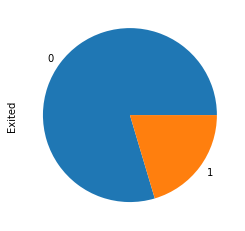

In [20]:
printf("Approximately a 20% churn rate or a 1:4 ratio which is not too bad\n")
churn.value_counts(1).plot.pie()

### Base model

In [21]:
def TE(X_train, X_test, y_train, y_test):    
    #Train the different supervised classification models
    score_tally = []
    
    # 1) KNN
    KNN = KNeighborsClassifier()
    KNN.fit(X_train, y_train)
    #call next function to evaluate the model
    score = evaluation(KNN, X_test, y_test)
    model_score = ["KNN", score]
    score_tally.append(model_score)
    
    # 2) SVM
    SVM = SVC()
    SVM.fit(X_train, y_train)
    score = evaluation(SVM, X_test, y_test)
    model_score = ["SVM", score]
    score_tally.append(model_score)
    
    # 3) Gaussian Naive Bayes
    GNB = GaussianNB()
    GNB.fit(X_train, y_train)
    score = evaluation(GNB, X_test, y_test)
    model_score = ["GNB", score]
    score_tally.append(model_score)
    
    # 4) Decision Tree
    DT = DecisionTreeClassifier()
    DT.fit(X_train, y_train)
    score = evaluation(DT, X_test, y_test)
    model_score = ["DT", score]
    score_tally.append(model_score)
    
    # 5) Random Forest
    RF = RandomForestClassifier() 
    RF.fit(X_train, y_train)
    score = evaluation(RF, X_test, y_test)
    model_score = ["RF", score]
    score_tally.append(model_score)

    # 6) Logistic Regression
    log = LogisticRegression()
    log.fit(X_train, y_train)
    score = evaluation(log, X_test, y_test)
    model_score = ["Log", score]
    score_tally.append(model_score)
    
    # 7) XGBoost #marginally more effective than RF only
#     xgb = XGBClassifier()
#     xgb.fit(X_train, y_train)
#     score = evaluation(xgb, X_test, y_test)
#     model_score = ["XGB", score]
#     score_tally.append(model_score)
    
    score_tally = pd.DataFrame(score_tally, columns =['Model', 'Recall Score']).sort_values(by='Recall Score')
    print(score_tally)
    
    return RF

In [22]:
#Predict values with test data and Evaluate the model
#using recall metric to measure churn
def evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)  
    score = recall_score(y_test, y_pred)
    #print("recall score = %.2f" % score)
    return "{:.2f}".format(score)

In [23]:
#prepare the data for training
X = scaled_df.drop('Exited',axis=1)

#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, scaled_df.Exited, test_size=0.2)
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 7988
Test size: 1998


In [24]:
#Train models and Evaluate model(TE)
model = TE(X_train, X_test, y_train, y_test)

printf("\nTo use random forest due to possible outliers and characteristics of the data\n")
printf("Nevertheless we try out each model to test\n")

  Model Recall Score
5   Log         0.21
1   SVM         0.32
0   KNN         0.34
2   GNB         0.36
3    DT         0.51
4    RF         0.51

To use random forest due to possible outliers and characteristics of the data

Nevertheless we try out each model to test



### Model Performance

Scrutinising RF metrics:



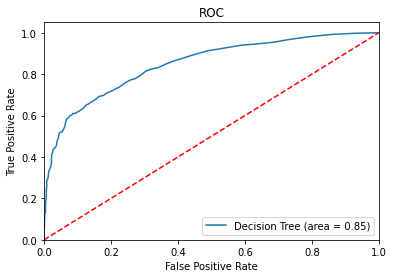

In [25]:
#Evaluate RF in detail (ROC)
printf("Scrutinising RF metrics:\n")
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_probs[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

    No churn       0.90      0.95      0.93      1631
       Churn       0.72      0.51      0.60       367

    accuracy                           0.87      1998
   macro avg       0.81      0.73      0.76      1998
weighted avg       0.86      0.87      0.87      1998



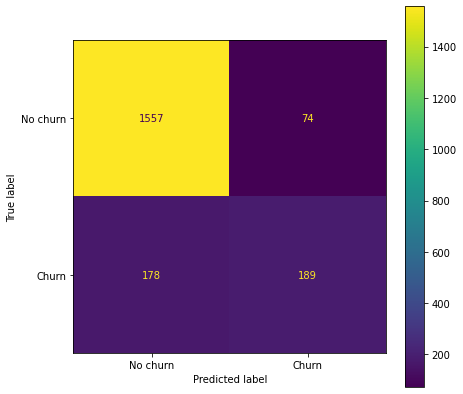

In [26]:
#Evaluate RF in detail (Confusion matrix and metrics)
classes = ['No churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=classes))
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(model, X_test, y_test, display_labels=classes, ax=ax, values_format = '');

###  Resampling (using SMOTE)

In [27]:
#resampling the data for the imbalance
sm = SMOTE()
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

In [28]:
# Retrain the model
model.fit(X_train_new, y_train_new)
y_pred_new = model.predict(X_test)

Results have improved:

              precision    recall  f1-score   support

    No churn       0.91      0.90      0.91      1631
       Churn       0.58      0.62      0.60       367

    accuracy                           0.85      1998
   macro avg       0.75      0.76      0.75      1998
weighted avg       0.85      0.85      0.85      1998



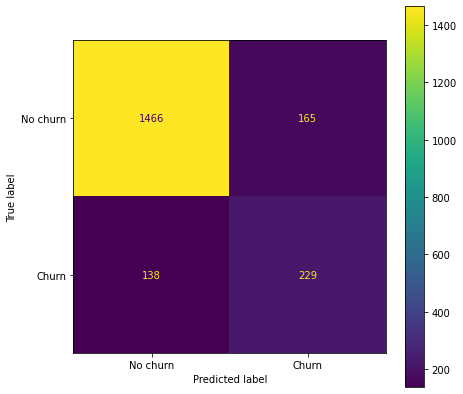

In [29]:
#Re-evaluate RF in detail (Confusion matrix and metrics)
printf("Results have improved:\n")
classes = ['No churn', 'Churn']
print(classification_report(y_test, y_pred_new, target_names=classes))
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(model, X_test, y_test, display_labels=classes, ax=ax, values_format = '');

### Hyperparameter Optimization

In [30]:
#tuning the parameters of the model and giving caution to overfitting at the same time
printf("Optimising model parameters:\n")

param_grid = { 
    'n_estimators': [50, 100, 200, 300],
    'criterion' :['gini', 'entropy'],
    'max_depth' : [60, 80, 100],
    'max_leaf_nodes' : [300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split' : [25],
    'min_samples_leaf' : [5],
    'n_jobs' : [-1],
    'oob_score' : [True]
}

model_Grid = GridSearchCV(estimator = RandomForestClassifier(),
                        param_grid = param_grid,
                        scoring = 'recall',
                        n_jobs = -1,
                        cv = 3,
                        verbose=5)
model_Grid.fit(X_train_new, y_train_new)
model_Grid.best_params_

Optimising model parameters:

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  8.0min finished


{'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'auto',
 'max_leaf_nodes': 500,
 'min_samples_leaf': 5,
 'min_samples_split': 25,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': True}

In [31]:
#set model to optimised parameters
model_optimised = RandomForestClassifier()
model_optimised.set_params(**model_Grid.best_params_)
model_optimised.fit(X_train_new, y_train_new);

Results have did not significantly improve:

We'll continue use the model after the resampling:

              precision    recall  f1-score   support

    No churn       0.91      0.90      0.91      1631
       Churn       0.58      0.62      0.60       367

    accuracy                           0.85      1998
   macro avg       0.75      0.76      0.75      1998
weighted avg       0.85      0.85      0.85      1998



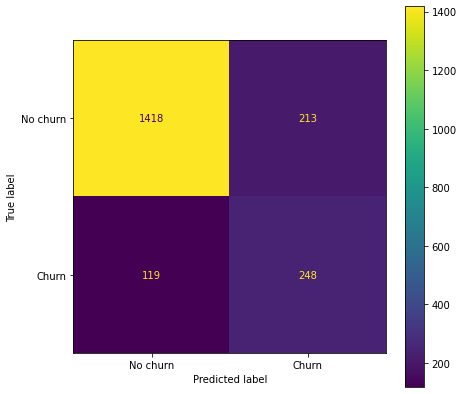

In [32]:
#Re-evaluate RF in detail (Confusion matrix and metrics)
printf("Results have did not significantly improve:\n")
printf("We'll continue use the model after the resampling:\n")
classes = ['No churn', 'Churn']
print(classification_report(y_test, y_pred_new, target_names=classes))
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(model_optimised, X_test, y_test, display_labels=classes, ax=ax, values_format = '');

### Most important features

In [33]:
#Top factors determining the outcome
printf("Factors determining the model prediction:\n")

#eli.explain_weights(model_optimised , feature_names = list(X.columns) )
perm = PermutationImportance(model).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

#if predicting
# eli.explain_prediction(model_optimised , X_test.iloc[0])

Factors determining the model prediction:



Weight,Feature
0.0752 ± 0.0102,Age
0.0685 ± 0.0094,Prod Number
0.0238 ± 0.0031,ActMem
0.0188 ± 0.0059,Balance
0.0091 ± 0.0026,Geography_Germany
0.0042 ± 0.0044,Gender_Male
0.0039 ± 0.0032,CredRate
0.0022 ± 0.0066,Tenure
-0.0005 ± 0.0075,EstimatedSalary
-0.0006 ± 0.0033,HasCrCard


### Feature Engrg / Ensembling

In [34]:
#to be done if there is more time
#feature engineering, creating ensemble of models, stacking, etc